#### PCA(Principle Componet Analysis) - 주성분 분석

#### 여러개의 변수(특성 Feature) 대표할 수 있는 주성분 이라는 새로운 변수를 만듦

#### 여러개의 3D 이미지(공간)를 잘 설명할 수 있는 2D 이미지(그림자)를 찾는다.

#### 1단계 : 데이터 표준화(Standaridization)
```
각 변수의 평균을 0, 분산을 1로 만들어서 모든 데이터가 동일한 스케일
키(3자리)와 몸무게(2자리)
```

In [38]:
%conda install pandas  scikit-learn matplotlib seaborn numpy

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [39]:
%conda update -n base -c defaults conda

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 예제데이터 붓꽃
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
X = df.loc[:,:"petal width (cm)"].values
# 표준화 진행
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### 2단계 : 공분산 행렬 계산(Covariance Matrix)
```
공분산 : 두 변수가 함께 어떻게 변하는지를 나타내는 값
양수 : 한변수가 증가할때 같이 증가
음수 : 반대
공분산 행렬 : 모든 변수 쌍들의 공분산을 행렬로 정리한 것--> 이 행렬을 통해서 데이터가 어떤방향으로 퍼져있는지 알수 있음
```

#### 3단계 : 고유값과 고유벡터 계산
```
공분산 행렬을 이용해서 고유값 고유벡터 찾는다
고유값벡터 : 데이터가 어떤 방향으로 가장 크게 분산(퍼져있는정도)되어 있지를 나타내는 방향 벡터 이 방향이 새로운 축 즉 주성분
고유값 : 해당 고유벡터 방향으로 데이터가 얼마나 많이 퍼져있는지는 나타내는 힘의크기, 이 값이 크면 그 방향이 데이터를 더 많이 설명한다는 의미

PCA 고유값의 크기 순서에따라서 제1 주성분(PC1), 제2 주성분(PC2)등..
PC1 데이터를 가장 잘 설명하는 축이고 PC2는 PC1 과 직각을 이루면서 그 다음으로 데이터를 잘 표현
```

#### 4단계 : 주성분 결정 및 데이터 변환
```
계산된 고유벡터축에 원래 데이터를 투영(projection)하여 차워을 축소함
붓꽃은 4개의 특성을 2개의 주성분(2차원)으로 변환해서 시각화
```

[0.72962445 0.22850762]


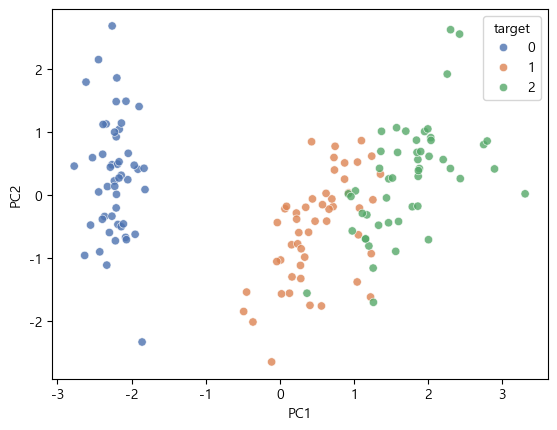

In [43]:
# 2 3 4 단계:  PCA수행 및 데이터 변환
pca = PCA(n_components=2)
pricipleComponents =  pca.fit_transform(X_scaled)
# 주성분 분석 결과를 DataFrame으로 변환
pc_df = pd.DataFrame(data=pricipleComponents,columns=['PC1','PC2'])
pc_df['target'] = df.target

# 각 주성분이 설명하는 분산의 양(고유값의 중요도)
print(pca.explained_variance_ratio_)  # 주 성분 두개 만으로도 전체대비 95.7% 설명

sns.scatterplot(data = pc_df, x = 'PC1', y='PC2', hue='target',alpha=0.8,palette='deep')
plt.show()


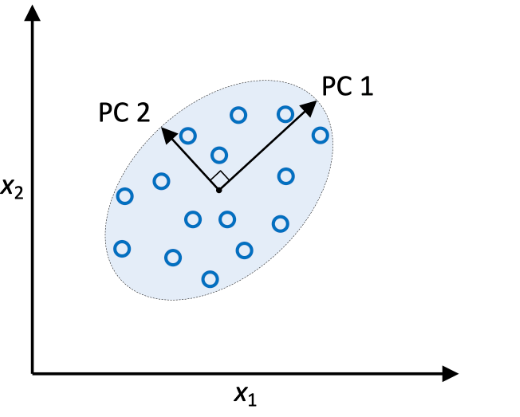

In [100]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
# 데이터셋  예측
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. 적절한 데이터 전처리
X_scaled = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x_train,y_train)
# 2 모델을 적용해서 score 를 확인
print(f'non pca train score : {rfr.score(x_train,y_train)}')
print(f'non pca train score : {rfr.score(x_test,y_test)}')
##############################################################
# 1. 적절한 데이터 전처리데이터를 가지고 PCA로 주성분을 적당한 개수로 설정해서 데이터를 변환해서
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x_train_pca, y_train)
# 2 모델을 적용해서 score 를 확인
print(f' pca train score : {rfr.score(x_train_pca,y_train)}')
print(f' pca train score : {rfr.score(x_test_pca,y_test)}')

non pca train score : 0.5772664640056762
non pca train score : 0.46926412179821353
 pca train score : 0.42580951156318947
 pca train score : 0.29616888298098576


In [105]:
# 하이퍼 파라메터 튜닝  gridsearch
# 학습에 영향주는 모든 파라메터를 하이퍼 파라메터

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 데이터셋  예측
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. 적절한 데이터 전처리
X_scaled = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor()
param_grid = {
    'max_depth':[3,5,10,12,15],
    'max_features':['sqrt','log2'],
    'min_samples_split': [1,2,5,10],
    'min_samples_leaf': [1,3,5,7],
}
gridcv = GridSearchCV(rfr,return_train_score=True,param_grid=param_grid)
gridcv.fit(x_train,y_train)

c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_c

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


In [117]:
gridcv.best_score_, gridcv.best_params_, gridcv.cv_results_['mean_train_score']

(np.float64(0.4447952240425456),
 {'max_depth': 15,
  'max_features': 'log2',
  'min_samples_leaf': 7,
  'min_samples_split': 2},
 array([       nan, 0.56842023, 0.56909775, 0.56786896,        nan,
        0.56772138, 0.56671243, 0.56358205,        nan, 0.5615366 ,
        0.56176404, 0.56142067,        nan, 0.55427431, 0.55532116,
        0.55487085,        nan, 0.5683738 , 0.56875967, 0.56789861,
               nan, 0.56590612, 0.56647233, 0.56273636,        nan,
        0.56177327, 0.56136569, 0.56428775,        nan, 0.55647034,
        0.55781304, 0.55471057,        nan, 0.72810344, 0.7197363 ,
        0.69658867,        nan, 0.69881307, 0.69944149, 0.68047396,
               nan, 0.66485534, 0.66373608, 0.66519794,        nan,
        0.63522386, 0.63380723, 0.63290083,        nan, 0.72942323,
        0.71978227, 0.69352175,        nan, 0.70132659, 0.69825942,
        0.68108779,        nan, 0.66327015, 0.66320301, 0.66361387,
               nan, 0.63470915, 0.63648228, 0.63424169

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 한글 폰트 설정 (Mac/Linux/Windows 환경에 따라 적절히 수정)
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# 또는 다음 코드를 사용하여 설치된 폰트를 확인하고 설정
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
except:
    pass

print("환경 설정 완료")

환경 설정 완료


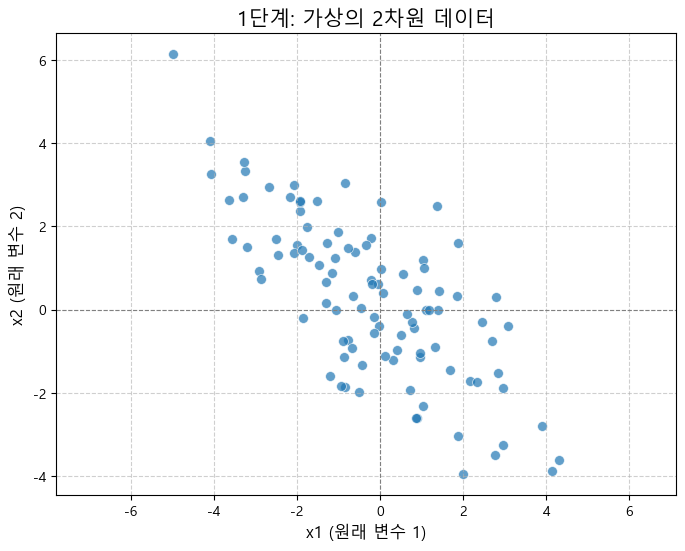

In [46]:
# 1. 가상의 2차원 데이터 생성
np.random.seed(42) # 재현성을 위해 시드 고정

# x1과 x2가 양의 상관관계를 가지도록 데이터를 만듭니다.
# 마치 x1과 x2가 모두 증가하는 경향이 있는 데이터처럼 보이게 합니다.
x = np.random.normal(loc=[0, 0], scale=[3, 1], size=(100, 2))
# 첫 번째 차원의 스케일을 더 크게 하여 더 큰 분산을 가지게 합니다.
# 그리고 회전시켜서 이미지와 같은 타원형 분포를 만듭니다.
theta = np.pi / 4 # 45도 회전
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])
data = x @ rotation_matrix

# 데이터프레임으로 변환하여 관리하기 쉽게 합니다.
df = pd.DataFrame(data, columns=['x1', 'x2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x1', y='x2', data=df, s=50, alpha=0.7)
plt.title('1단계: 가상의 2차원 데이터', fontsize=15)
plt.xlabel('x1 (원래 변수 1)', fontsize=12)
plt.ylabel('x2 (원래 변수 2)', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal') # x, y축 스케일을 동일하게 하여 왜곡 없이 보이게 함
plt.show()

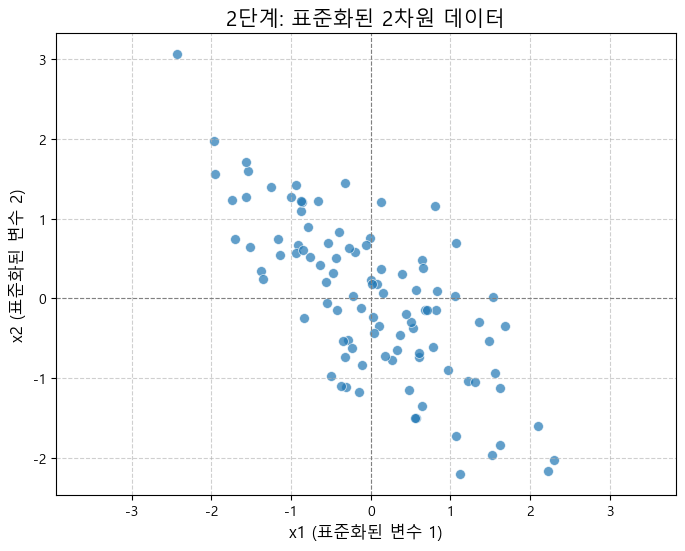

In [47]:
# 2. 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) # numpy 배열로 반환
scaled_df = pd.DataFrame(scaled_data, columns=['x1_scaled', 'x2_scaled'])

# 표준화 후 데이터 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x1_scaled', y='x2_scaled', data=scaled_df, s=50, alpha=0.7)
plt.title('2단계: 표준화된 2차원 데이터', fontsize=15)
plt.xlabel('x1 (표준화된 변수 1)', fontsize=12)
plt.ylabel('x2 (표준화된 변수 2)', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.show()

In [48]:
# 3. 공분산 행렬 계산 (Numpy를 직접 사용)
covariance_matrix = np.cov(scaled_data.T) # .T는 전치(Transpose)
print("공분산 행렬:\n", covariance_matrix)

# 4. 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 고유값과 고유벡터를 짝지어 고유값 내림차순으로 정렬 (중요도 순으로)
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

print("\n정렬된 고유값:", [pair[0] for pair in eigen_pairs])
print("정렬된 고유벡터 (PC1, PC2):\n", np.array([pair[1] for pair in eigen_pairs]))

# 첫 번째 고유벡터가 PC1, 두 번째 고유벡터가 PC2
pc1_vector = eigen_pairs[0][1]
pc2_vector = eigen_pairs[1][1]

print("\nPC1 (첫 번째 주성분 벡터):", pc1_vector)
print("PC2 (두 번째 주성분 벡터):", pc2_vector)

공분산 행렬:
 [[ 1.01010101 -0.74497021]
 [-0.74497021  1.01010101]]

정렬된 고유값: [np.float64(1.7550712226749083), np.float64(0.2651307975271132)]
정렬된 고유벡터 (PC1, PC2):
 [[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]

PC1 (첫 번째 주성분 벡터): [ 0.70710678 -0.70710678]
PC2 (두 번째 주성분 벡터): [-0.70710678 -0.70710678]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


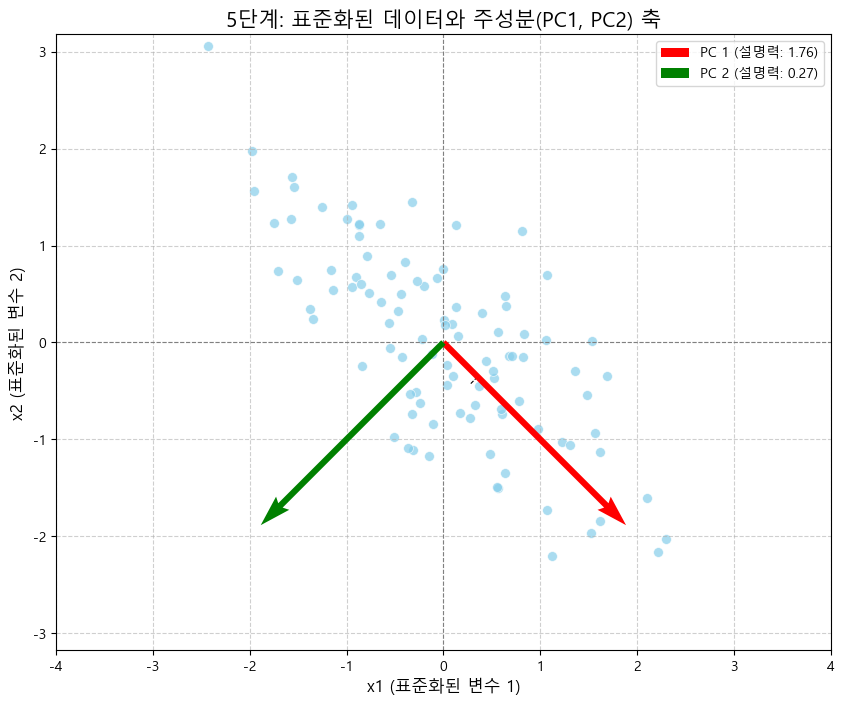

In [49]:
# 5. 주성분 (고유벡터) 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1_scaled', y='x2_scaled', data=scaled_df, s=50, alpha=0.7, color='skyblue')
plt.title('5단계: 표준화된 데이터와 주성분(PC1, PC2) 축', fontsize=15)
plt.xlabel('x1 (표준화된 변수 1)', fontsize=12)
plt.ylabel('x2 (표준화된 변수 2)', fontsize=12)

# 원점(0,0)을 기준으로 PC1, PC2 벡터 그리기
origin = [0], [0] # 원점

# PC1 그리기 (빨간색)
plt.quiver(*origin, pc1_vector[0], pc1_vector[1], color=['red'], scale=3, width=0.008,
           label=f'PC 1 (설명력: {eigen_pairs[0][0]:.2f})', zorder=5) # scale 조정으로 길이 조절

# PC2 그리기 (녹색)
plt.quiver(*origin, pc2_vector[0], pc2_vector[1], color=['green'], scale=3, width=00.008,
           label=f'PC 2 (설명력: {eigen_pairs[1][0]:.2f})', zorder=5) # scale 조정으로 길이 조절

# 이미지의 직각 표시를 위해 작은 선분 그리기 (선택 사항)
# 두 벡터가 거의 직교함을 시각적으로 보여줌
plt.plot([0, pc1_vector[0]*0.5], [0, pc1_vector[1]*0.5], color='red', linestyle='-', linewidth=1)
plt.plot([0, pc2_vector[0]*0.5], [0, pc2_vector[1]*0.5], color='green', linestyle='-', linewidth=1)
plt.plot([pc1_vector[0]*0.5, pc1_vector[0]*0.5 + pc2_vector[0]*0.1],
         [pc1_vector[1]*0.5, pc1_vector[1]*0.5 + pc2_vector[1]*0.1],
         color='black', linestyle='--', linewidth=0.8)


plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()


scikit-learn PCA의 고유 벡터 (components_):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
scikit-learn PCA의 설명된 분산 비율 (explained_variance_ratio_):
 [0.86876026 0.13123974]


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


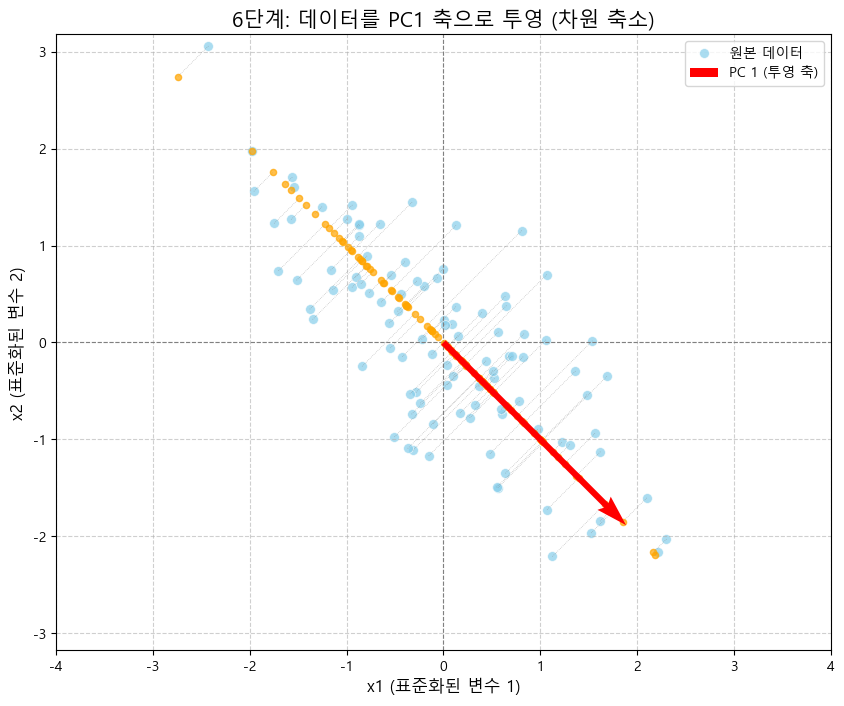

In [52]:
# 6. 데이터를 주성분 축에 투영 (차원 축소)
# scikit-learn의 PCA 객체를 다시 사용하여 변환을 쉽게 수행합니다.
# 이미 고유값, 고유벡터를 수동으로 계산했지만, sklearn으로 검증하고 투영을 수행합니다.
pca_sklearn = PCA(n_components=2) # 일단 2개의 주성분 모두 추출
pca_sklearn.fit(scaled_data)

# PC1, PC2 벡터 다시 확인 (scikit-learn 결과)
# scikit-learn은 기본적으로 가장 중요한 순서대로 정렬하여 반환
print("\nscikit-learn PCA의 고유 벡터 (components_):\n", pca_sklearn.components_)
print("scikit-learn PCA의 설명된 분산 비율 (explained_variance_ratio_):\n", pca_sklearn.explained_variance_ratio_)

# 원본 데이터를 2개의 주성분으로 변환 (투영)
transformed_data_2d = pca_sklearn.transform(scaled_data)
transformed_df_2d = pd.DataFrame(transformed_data_2d, columns=['PC1', 'PC2'])

# --- 2차원 -> 1차원 투영 시각화 ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x1_scaled', y='x2_scaled', data=scaled_df, s=50, alpha=0.7, color='skyblue', label='원본 데이터')

# PC1 벡터 다시 그리기 (투영할 축)
plt.quiver(*origin, pc1_vector[0], pc1_vector[1], color=['red'], scale=3, width=0.008,
           label='PC 1 (투영 축)', zorder=5)

# 각 데이터 포인트를 PC1 축에 투영하는 과정을 시각화
# 투영된 점은 PC1 축 위에 있습니다.
# 원래 점과 투영된 점을 연결하는 선분 그리기
# 투영된 점은 (original_point . dot . pc1_vector) * pc1_vector 입니다.
# dot product는 스칼라 값 (PC1 축 위에서의 위치)
# 그 스칼라 값에 다시 PC1 벡터를 곱하면 PC1 축 위에서의 좌표가 됩니다.

for i in range(len(scaled_data)):
    original_point = scaled_data[i]
    # PC1 벡터에 투영된 점의 좌표
    projected_point_on_pc1 = (np.dot(original_point, pc1_vector)) * pc1_vector

    # 원래 점과 PC1 축 위 투영된 점 연결 (회색 점선)
    plt.plot([original_point[0], projected_point_on_pc1[0]],
             [original_point[1], projected_point_on_pc1[1]],
             color='gray', linestyle=':', linewidth=0.5, alpha=0.6)
    # 투영된 점 그리기 (주황색)
    plt.scatter(projected_point_on_pc1[0], projected_point_on_pc1[1],
                color='orange', s=20, alpha=0.7, zorder=4)

plt.title('6단계: 데이터를 PC1 축으로 투영 (차원 축소)', fontsize=15)
plt.xlabel('x1 (표준화된 변수 1)', fontsize=12)
plt.ylabel('x2 (표준화된 변수 2)', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.legend()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1. 데이터 로드 및 분할
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 기본 모델 성능 확인
rf_basic = RandomForestRegressor(random_state=42)
rf_basic.fit(X_train, y_train)
pred_basic = rf_basic.predict(X_test)
r2_basic = r2_score(y_test, pred_basic)
print(f"기본 랜덤 포레스트 R²: {r2_basic:.4f}")

print("-" * 30)

# 3. GridSearchCV를 사용한 하이퍼파라미터 튜닝
# 테스트할 파라미터 조합 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=2, scoring='r2')

# 튜닝 시작
grid_search.fit(X_train, y_train)

# 4. 최적 모델로 성능 확인
print("\n최적의 하이퍼파라미터:", grid_search.best_params_)

best_model = grid_search.best_estimator_
pred_tuned = best_model.predict(X_test)
r2_tuned = r2_score(y_test, pred_tuned)

print(f"\n튜닝 후 랜덤 포레스트 R²: {r2_tuned:.4f}")
print(f"성능 향상: {r2_tuned - r2_basic:.4f}")

기본 랜덤 포레스트 R²: 0.4428
------------------------------
Fitting 5 folds for each of 24 candidates, totalling 120 fits

최적의 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

튜닝 후 랜덤 포레스트 R²: 0.4446
성능 향상: 0.0018


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# ... (데이터 로드 및 분할 코드는 이전과 동일)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2차 다항 특성을 생성하고 선형 회귀 모델과 연결하는 파이프라인
poly_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# 향상된 데이터로 모델 학습
poly_reg.fit(X_train, y_train)

# 성능 평가
r2_poly = poly_reg.score(X_test, y_test)

print(f"다항 특성 추가 후 R²: {r2_poly:.4f}")

다항 특성 추가 후 R²: 0.4156


In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

# 1. 데이터 로드 및 분할
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 다항 특성 + 스케일링 + Ridge 회귀 파이프라인 생성
ridge_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(), # 스케일링 단계 추가
    Ridge(alpha=1.0)  # 규제가 있는 Ridge 모델 사용
)

# 3. 모델 학습 및 평가
ridge_poly.fit(X_train, y_train)
r2_ridge_poly = ridge_poly.score(X_test, y_test)

print(f"다항 특성 + Ridge 규제 적용 후 R²: {r2_ridge_poly:.4f}")

다항 특성 + Ridge 규제 적용 후 R²: 0.4558
